In [1]:
import wfdb
import matplotlib.pyplot as plt

In [2]:
record_path = './data/scddb/30'

In [3]:
record = wfdb.rdrecord(record_path)
ann = wfdb.rdann(record_path, 'atr')
fs = record.fs

In [4]:
start_str = "00:26:35"  # 'beginning at 26:35.000'
vfon_str = "07:54:33"   # 'vfon: 07:54:33'

In [5]:
def hms_to_seconds(hms):
    h, m, s = hms.split(":")
    return int(h)*3600 + int(m)*60 + int(s)

start_seconds = hms_to_seconds(start_str)
vfon_seconds = hms_to_seconds(vfon_str)
delta_seconds = vfon_seconds - start_seconds  # offset into this record

vfon_sample = delta_seconds * fs
print(f"VF onset sample index for record 30: {vfon_sample}")

VF onset sample index for record 30: 6719500


In [6]:
import numpy as np

pre_event_sec = 60  # 1 minute
pre_event_samples = int(pre_event_sec * fs)

start_idx = max(0, vfon_sample - pre_event_samples)
end_idx = vfon_sample  # up to the VF onset

ecg_segment = record.p_signal[start_idx:end_idx, :]  # shape (samples, 2) if 2 channels

print(f"Extracted a {pre_event_sec}-second segment before VF onset.")

Extracted a 60-second segment before VF onset.


In [7]:
ex_1 = vfon_seconds * fs

In [8]:
ex_1

7118250

In [9]:
vfon_sample

6719500

In [10]:
ex_1 - vfon_sample

398750

In [11]:
import numpy as np

pre_event_sec_1 = 60  # 1 minute
pre_event_samples_1 = int(pre_event_sec_1 * fs)

start_idx_1 = max(0, ex_1 - pre_event_samples_1)
end_idx_1 = ex_1  # up to the VF onset

ecg_segment_1 = record.p_signal[start_idx_1:end_idx_1, :]  # shape (samples, 2) if 2 channels

print(f"Extracted a {pre_event_sec_1}-second segment before VF onset.")

Extracted a 60-second segment before VF onset.


In [12]:
import numpy as np

pre_event_sec_1 = 60 * 30  # 1 minute
pre_event_samples_1 = int(pre_event_sec_1 * fs)

start_idx_1 = max(0, ex_1 - pre_event_samples_1)
end_idx_1 = ex_1  # up to the VF onset

ecg_segment_1 = record.p_signal[start_idx_1:end_idx_1, :]  # shape (samples, 2) if 2 channels

print(f"Extracted a {pre_event_sec_1}-second segment before VF onset.")

Extracted a 1800-second segment before VF onset.


In [13]:
import numpy as np

pre_event_sec_1 = 60 * 5  # 1 minute
pre_event_samples_1 = int(pre_event_sec_1 * fs)

start_idx_1 = max(0, ex_1 - pre_event_samples_1)
end_idx_1 = ex_1  # up to the VF onset

ecg_segment_1 = record.p_signal[start_idx_1:end_idx_1, :]  # shape (samples, 2) if 2 channels

print(f"Extracted a {pre_event_sec_1}-second segment before VF onset.")

Extracted a 300-second segment before VF onset.


In [14]:
import numpy as np

pre_event_sec_1 = 60 * 5  # 1 minute
pre_event_samples_1 = int(pre_event_sec_1 * fs)

start_idx_1 = max(0, vfon_sample - pre_event_samples_1)
end_idx_1 = vfon_sample  # up to the VF onset

ecg_segment_1 = record.p_signal[start_idx_1:end_idx_1, :]  # shape (samples, 2) if 2 channels

print(f"Extracted a {pre_event_sec_1}-second segment before VF onset.")

Extracted a 300-second segment before VF onset.


In [15]:
import numpy as np

pre_event_sec_1 = 60 * 5  # 1 minute
pre_event_samples_1 = int(pre_event_sec_1 * fs)

start_idx_1 = max(0, ex_1 - pre_event_samples_1)
end_idx_1 = ex_1  # up to the VF onset

ecg_segment_1 = record.p_signal[start_idx_1:end_idx_1, :]  # shape (samples, 2) if 2 channels

print(f"Extracted a {pre_event_sec_1}-second segment before VF onset.")

Extracted a 300-second segment before VF onset.


In [16]:
import numpy as np

pre_event_sec_1 = 60 * 5  # 1 minute
pre_event_samples_1 = int(pre_event_sec_1 * fs)

start_idx_1 = max(0, ex_1 - pre_event_samples_1)
end_idx_1 = ex_1  # up to the VF onset

ecg_segment_1 = record.p_signal[start_idx_1:end_idx_1, :]  # shape (samples, 2) if 2 channels

print(f"Extracted a {pre_event_sec_1}-second segment before VF onset.")


Extracted a 300-second segment before VF onset.


Extracted a 300-second segment before VF onset.


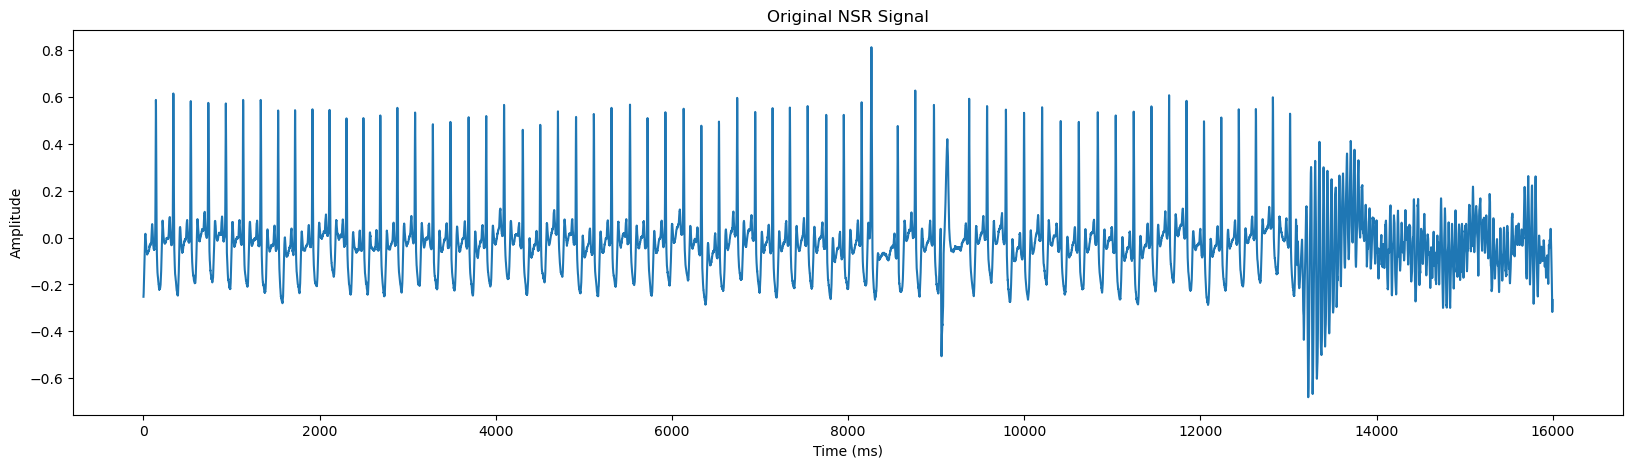

In [24]:
import numpy as np

pre_event_sec_1 = 60 * 5  # 1 minute
pre_event_samples_1 = int(pre_event_sec_1 * fs)

start_idx_1 = max(0, ex_1 - pre_event_samples_1)
end_idx_1 = ex_1  # up to the VF onset

ecg_segment_1 = record.p_signal[start_idx_1+62000:ex_1+3000, :]  # shape (samples, 2) if 2 channels

print(f"Extracted a {pre_event_sec_1}-second segment before VF onset.")

plt.figure(figsize=(20, 5))
plt.subplot()
plt.plot(ecg_segment_1[:,0])
plt.title('Original NSR Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.show()

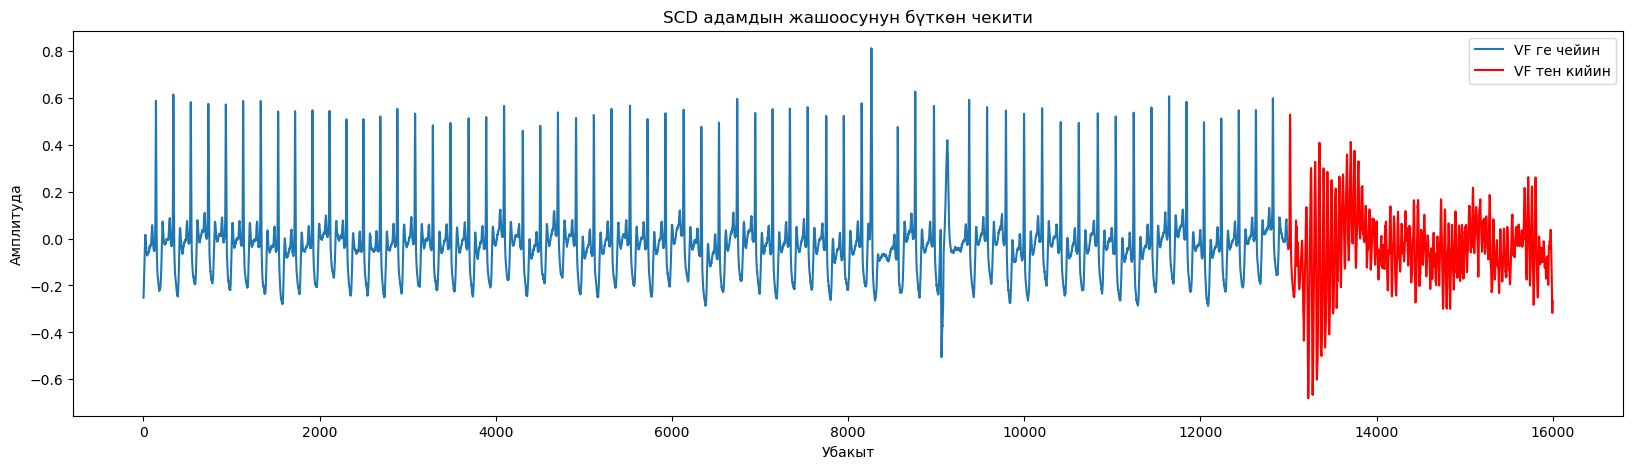

In [29]:
import numpy as np
import matplotlib.pyplot as plt

pre_event_sec_1 = 60 * 5  # 5 minutes
pre_event_samples_1 = int(pre_event_sec_1 * fs)

start_idx_1 = max(0, ex_1 - pre_event_samples_1)
end_idx_1 = ex_1  # up to VF onset

# Extract segment: 5 minutes before to 3 seconds after VF onset
ecg_segment_1 = record.p_signal[start_idx_1 + 62000 : ex_1 + 3000, :]  # shape (samples, 2)

# Determine sample index of VF onset relative to extracted segment
vf_relative_index = (ex_1 - (start_idx_1 + 62000))

# Plot
plt.figure(figsize=(20, 5))
plt.subplot()

# Blue part: before VF onset
plt.plot(ecg_segment_1[:vf_relative_index, 0], label='VF ге чейин')

# Red part: from VF onset to 3 sec after
plt.plot(np.arange(vf_relative_index, len(ecg_segment_1)), 
         ecg_segment_1[vf_relative_index:, 0], color='red', label='VF тен кийин')

plt.title('SCD адамдын жашоосунун бүткөн чекити')
plt.xlabel('Убакыт')
plt.ylabel('Амплитуда')
plt.legend()
plt.savefig('./img/scdonsetofvf.png', dpi=300, bbox_inches='tight')
plt.show()


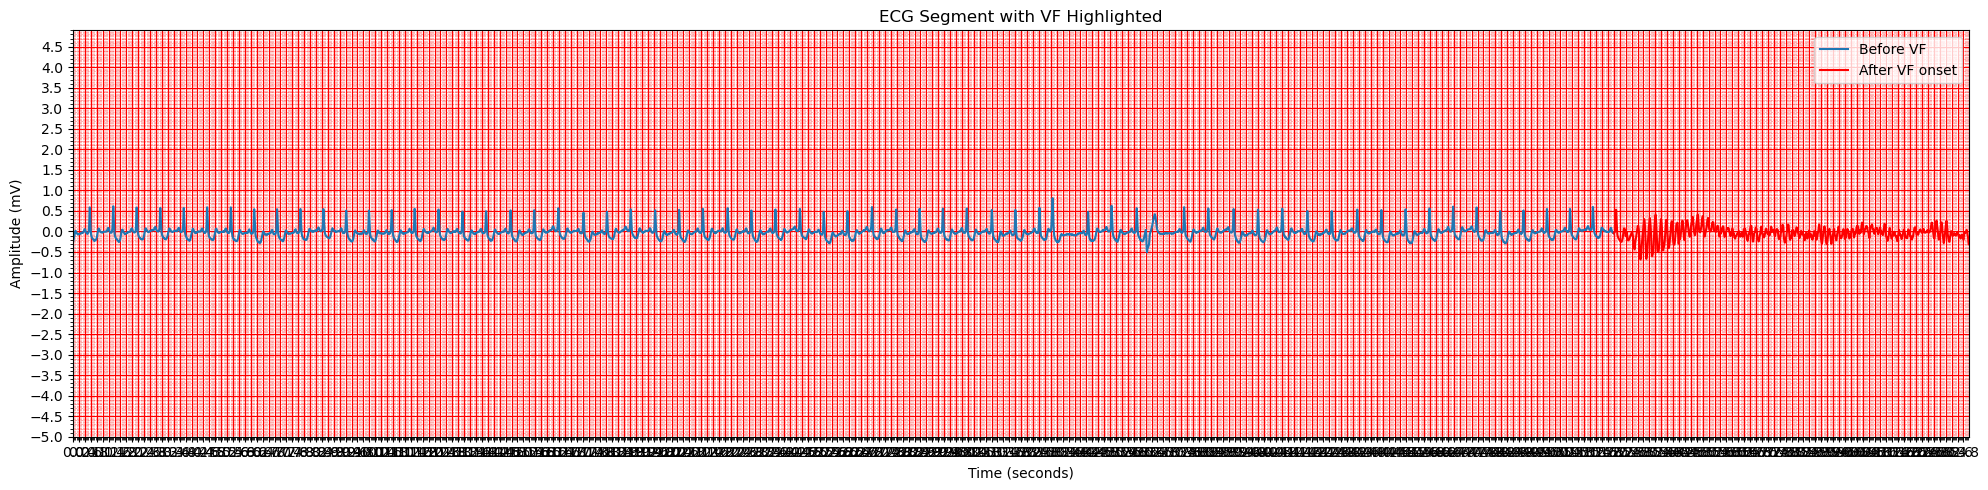

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 250  # Sampling rate in Hz
pre_event_sec_1 = 60 * 5  # 5 minutes
pre_event_samples_1 = int(pre_event_sec_1 * fs)

start_idx_1 = max(0, ex_1 - pre_event_samples_1)

# Extract ECG segment: 5 minutes before to 3 seconds after VF onset
ecg_segment_1 = record.p_signal[start_idx_1 + 62000 : ex_1 + 3000, :]  # (samples, channels)

# Time axis in seconds
time = np.arange(len(ecg_segment_1)) / fs

# Index of VF onset relative to this segment
vf_relative_index = ex_1 - (start_idx_1 + 62000)

# Plot setup
plt.figure(figsize=(20, 5))
ax = plt.gca()

# ECG plot: default color before VF, red after
ax.plot(time[:vf_relative_index], ecg_segment_1[:vf_relative_index, 0], label='Before VF')  # default blue
ax.plot(time[vf_relative_index:], ecg_segment_1[vf_relative_index:, 0], color='red', label='After VF onset')

# Axis limits
ax.set_xlim(time[0], time[-1])
ax.set_ylim(min(ecg_segment_1[:, 0]) - 0.5, max(ecg_segment_1[:, 0]) + 0.5)

# ECG paper grid
# Minor grid: every 0.04 sec (small square) and 0.1 mV
ax.set_xticks(np.arange(time[0], time[-1], 0.04), minor=True)
ax.set_yticks(np.arange(-5, 5, 0.1), minor=True)

# Major grid: every 0.2 sec and 0.5 mV
ax.set_xticks(np.arange(time[0], time[-1], 0.2))
ax.set_yticks(np.arange(-5, 5, 0.5))

# Style the grid like ECG paper
ax.grid(which='major', color='red', linewidth=0.8)
ax.grid(which='minor', color='red', linestyle=':', linewidth=0.4)

# Labels and title
ax.set_title('ECG Segment with VF Highlighted')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude (mV)')
ax.legend()

plt.tight_layout()
plt.show()

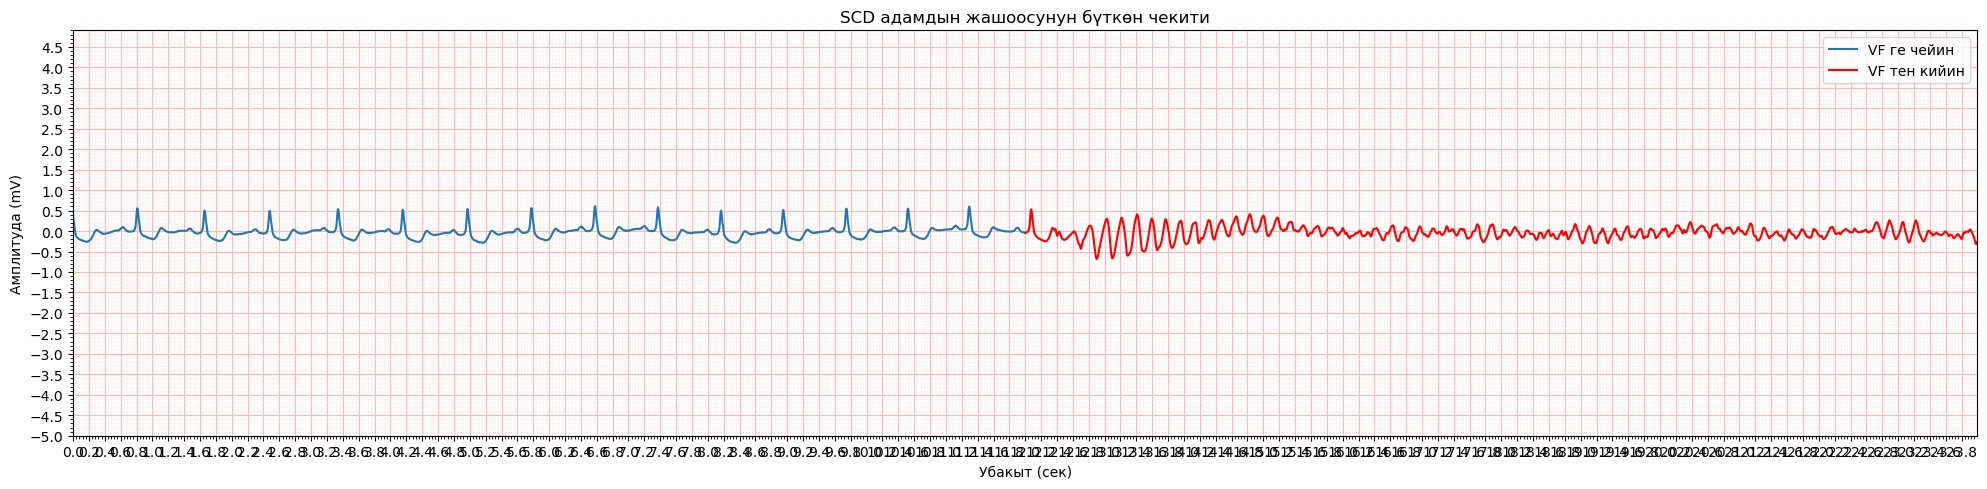

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 250  # Sampling rate
pre_event_sec_1 = 60 * 5
pre_event_samples_1 = int(pre_event_sec_1 * fs)
start_idx_1 = max(0, ex_1 - pre_event_samples_1)

# Extract ECG segment
ecg_segment_1 = record.p_signal[start_idx_1 + 72000 : ex_1 + 3000, :]
time = np.arange(len(ecg_segment_1)) / fs
vf_relative_index = ex_1 - (start_idx_1 + 72000)

# Plot
plt.figure(figsize=(20, 5))
ax = plt.gca()

# ECG signal
ax.plot(time[:vf_relative_index], ecg_segment_1[:vf_relative_index, 0], label='VF ге чейин')  # Default blue
ax.plot(time[vf_relative_index:], ecg_segment_1[vf_relative_index:, 0], color='red', label='VF тен кийин')

# Axis limits
ax.set_xlim(time[0], time[-1])
ax.set_ylim(min(ecg_segment_1[:, 0]) - 0.5, max(ecg_segment_1[:, 0]) + 0.5)

# ECG grid (soft pink colors)
soft_red_major = '#FFB6B6'  # Light red
soft_red_minor = '#FFDCDC'  # Very pale red

# Gridlines
ax.set_xticks(np.arange(time[0], time[-1], 0.04), minor=True)
ax.set_yticks(np.arange(-5, 5, 0.1), minor=True)
ax.set_xticks(np.arange(time[0], time[-1], 0.2))
ax.set_yticks(np.arange(-5, 5, 0.5))

ax.grid(which='major', color=soft_red_major, linewidth=0.8)
ax.grid(which='minor', color=soft_red_minor, linestyle=':', linewidth=0.5)

# Labels
ax.set_title('SCD адамдын жашоосунун бүткөн чекити')
ax.set_xlabel('Убакыт (сек)')
ax.set_ylabel('Амплитуда (mV)')
ax.legend()

plt.tight_layout()
plt.savefig('./img/scdonsetofvfecgpaper.png', dpi=300, bbox_inches='tight')

plt.show()